# Time Series Analysis Part 1
Fitting a time-series model to an example suburb-type instance, to find adequate model parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

In [2]:
# Load the data
df = pd.read_csv('../data/curated/historical_data.csv')
df

,type,suburb,Count,Date,Median,year_completed,sa2_name,sa2_code,Unnamed: 0,SA2_CODE,Population,percentage_change_rental_price,percentage_change_population
0,1 bedroom flat,Altona,87.0,2000-03-01,95.0,2000,Altona,213021341,930,213021341,12297.095890,NaN,NaN
1,1 bedroom flat,Altona,94.0,2000-06-01,100.0,2000,Altona,213021341,1452,213021341,12271.915068,0.052632,-0.002048
2,1 bedroom flat,Altona,97.0,2000-09-01,105.0,2000,Altona,213021341,1974,213021341,12246.457534,0.050000,-0.002074
3,1 bedroom flat,Altona,98.0,2000-12-01,105.0,2000,Altona,213021341,2496,213021341,12221.000000,0.000000,-0.002079
4,1 bedroom flat,Altona,89.0,2001-03-01,105.0,2001,Altona,213021341,3018,213021341,12196.095890,0.000000,-0.002038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,All properties,Wodonga,1233.0,2022-03-01,380.0,2022,Wodonga,204031492,46538,204031492,14863.726027,0.027027,-0.001094
29620,All properties,Wodonga,1267.0,2022-06-01,390.0,2022,Wodonga,204031492,47060,204031492,14847.271233,0.026316,-0.001107
29621,All properties,Wodonga,1251.0,2022-09-01,400.0,2022,Wodonga,204031492,47582,204031492,14830.635616,0.025641,-0.001120
29622,All properties,Wodonga,1191.0,2022-12-01,410.0,2022,Wodonga,204031492,48104,204031492,14814.000000,0.025000,-0.001122


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

## Conduct time-series analysis on an example suburb-type instance

In [4]:
example_suburb = 'Fitzroy'
example_type = '1 bedroom flat'

In [5]:
data_example = df[(df['suburb'] == example_suburb) & (df['type'] == example_type)]
print(data_example.head())
data_example = data_example[['Date', 'Median']].set_index('Date')
data_example['Median'] = pd.to_numeric(data_example['Median'], errors='coerce')

                 type   suburb  Count       Date  Median  year_completed  \
12880  1 bedroom flat  Fitzroy  176.0 2000-03-01   140.0            2000   
12881  1 bedroom flat  Fitzroy  183.0 2000-06-01   140.0            2000   
12882  1 bedroom flat  Fitzroy  178.0 2000-09-01   150.0            2000   
12883  1 bedroom flat  Fitzroy  175.0 2000-12-01   150.0            2000   
12884  1 bedroom flat  Fitzroy  187.0 2001-03-01   150.0            2001   

      sa2_name   sa2_code  Unnamed: 0   SA2_CODE   Population  \
12880  Fitzroy  206071142         681  206071142  8173.356164   
12881  Fitzroy  206071142        1203  206071142  8220.227397   
12882  Fitzroy  206071142        1725  206071142  8267.613699   
12883  Fitzroy  206071142        2247  206071142  8315.000000   
12884  Fitzroy  206071142        2769  206071142  8361.356164   

       percentage_change_rental_price  percentage_change_population  
12880                             NaN                           NaN  
12881       

### ADF Test for stationary

In [6]:
result = adfuller(data_example['Median'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.097550
p-value: 0.716048


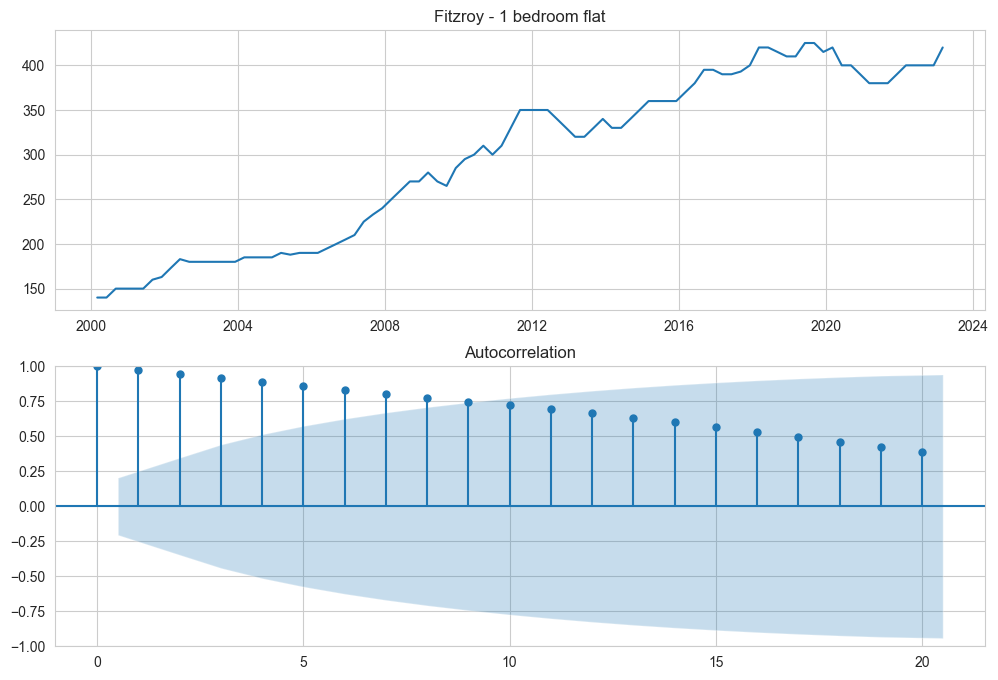

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(data_example.index, data_example['Median'])
ax1.set_title(f'{example_suburb} - {example_type}')
plot_acf(data_example['Median'], ax=ax2);

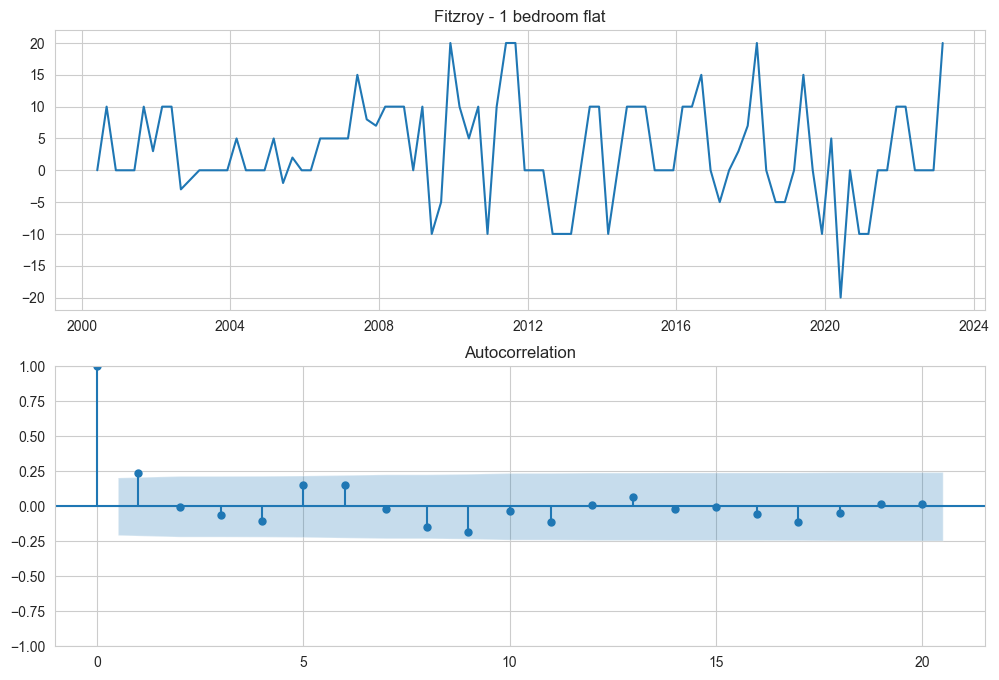

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(data_example['Median'].diff().dropna(), label='Median')
ax1.set_title(f'{example_suburb} - {example_type}')
plot_acf(data_example['Median'].diff().dropna(), ax=ax2);

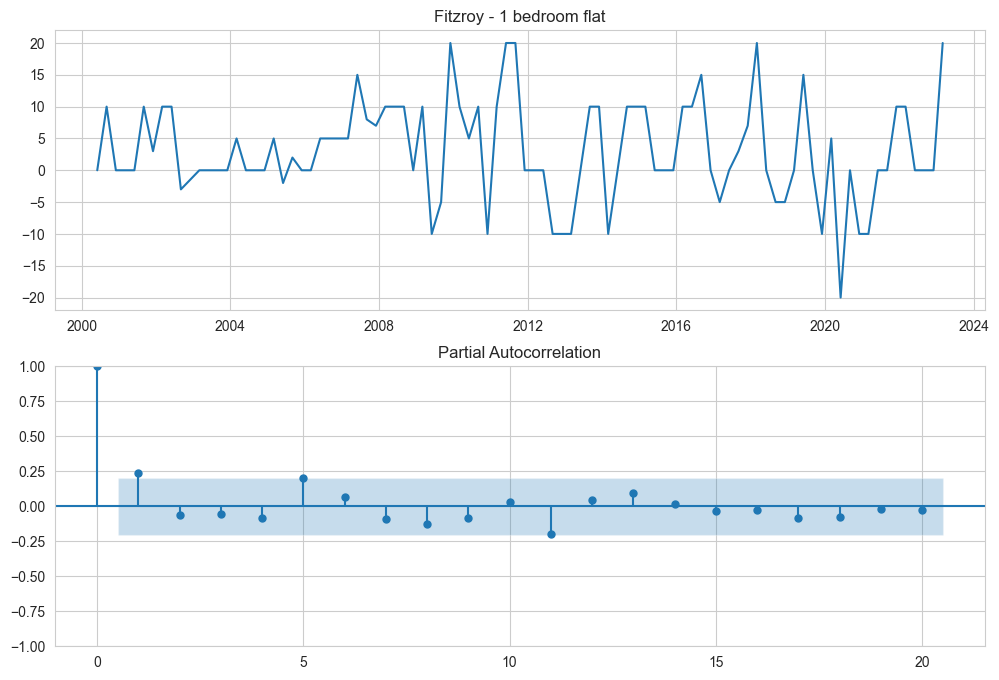

In [9]:
diff = data_example['Median'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(diff)
ax1.set_title(f'{example_suburb} - {example_type}')
plot_pacf(diff, ax=ax2);

In [10]:
# p = 4, d = 1, q = 3
model = ARIMA(data_example['Median'], order=(4, 1, 3))
model_fit = model.fit()

/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Median   No. Observations:                   92
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -314.472
Date:                Sat, 05 Oct 2024   AIC                            644.944
Time:                        17:27:50   BIC                            665.031
Sample:                             0   HQIC                           653.048
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9791      2.217      0.442      0.659      -3.366       5.324
ar.L2         -0.0772      3.869     -0.020      0.984      -7.660       7.506
ar.L3         -0.6502      3.132     -0.208      0.836      -6.790       5.489
ar.L4          0.3066      0.969      0.316      0.752      -1.592       2.205
ma.L1         -0.6464      2.202     -0.293      0.769      -4.963       3.670
ma.L2         -0.2197      3.094     -0.071      0.943      -6.284       5.844
ma.L3          0.6822      1.889      0.361      0.718      -3.021       4.385
sigma2        58.2584      9.242      6.304      0.000      40.145      76.372
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.43   Prob(JB):                         0.77
Heteroskedasticity (H):               3.21   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plot distribution of errors to detect any systematic issues

(array([ 3., 14., 38., 27.,  8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-20.67432757, -12.64061119,  -4.60689482,   3.42682156,
         11.46053794,  19.49425432,  27.5279707 ,  35.56168708,
         43.59540346,  51.62911983,  59.66283621,  67.69655259,
         75.73026897,  83.76398535,  91.79770173,  99.83141811,
        107.86513449, 115.89885086, 123.93256724, 131.96628362,
        140.        ]),
 <BarContainer object of 20 artists>)

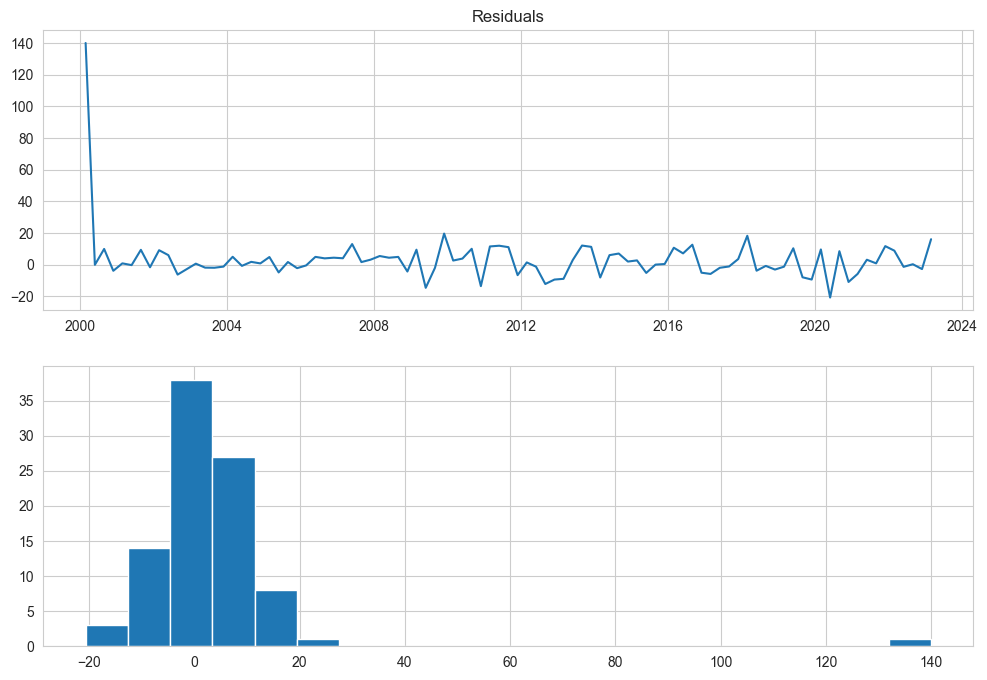

In [12]:
residuals = pd.DataFrame(model_fit.resid)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(residuals)
ax1.set_title('Residuals')
ax2.hist(residuals, bins=20)

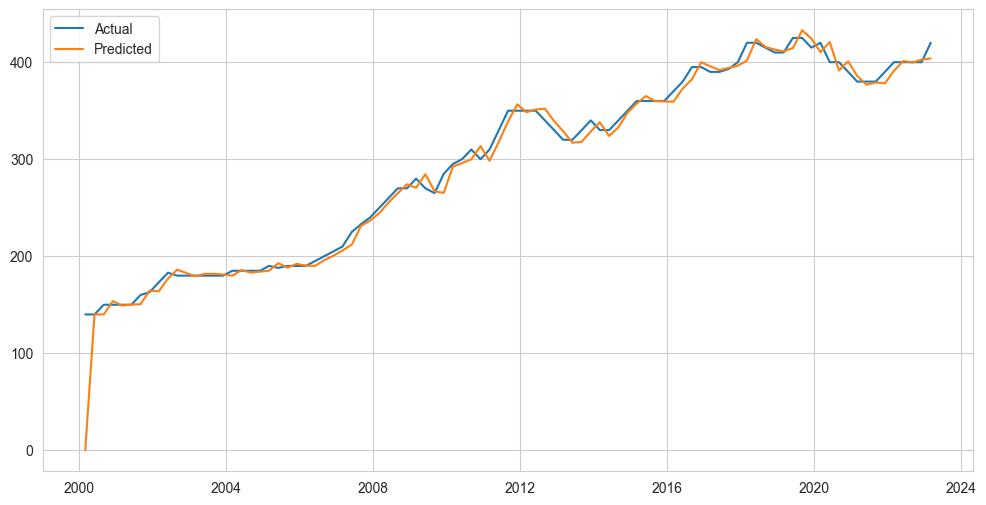

In [13]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data_example.index, data_example['Median'], label='Actual')
plt.plot(data_example.index, model_fit.fittedvalues, label='Predicted')
plt.legend()
plt.show()

In [14]:
n = int(len(data_example) * 0.8)
train = data_example.iloc[:n]
test = data_example.iloc[n:]
print(train.shape, test.shape)

(73, 1) (19, 1)


In [15]:
model = ARIMA(train['Median'], order=(4, 1, 3))
model_fit = model.fit()

/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagra

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Median   No. Observations:                   73
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -240.717
Date:                Sat, 05 Oct 2024   AIC                            497.434
Time:                        17:27:51   BIC                            515.648
Sample:                             0   HQIC                           504.685
                                 - 73                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.3209      0.204     11.372      0.000       1.921       2.721
ar.L2         -2.5680      0.383     -6.710      0.000      -3.318      -1.818
ar.L3          1.4812      0.336      4.404      0.000       0.822       2.140
ar.L4         -0.2342      0.151     -1.547      0.122      -0.531       0.063
ma.L1         -2.0656      0.366     -5.637      0.000      -2.784      -1.347
ma.L2          2.0112      0.446      4.511      0.000       1.137       2.885
ma.L3         -0.9378      0.308     -3.040      0.002      -1.542      -0.333
sigma2        44.5579     13.694      3.254      0.001      17.718      71.398
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.99   Prob(JB):                         0.86
Heteroskedasticity (H):               2.93   Skew:                            -0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecast rental price growth within past data, and compare with actual trend

In [17]:
forecast = model_fit.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_ci

/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower Median,upper Median
73,405.794691,432.051175
74,396.761488,439.033360
75,393.110354,447.515626
76,394.976791,458.938154
77,398.842780,470.974308
78,400.176468,480.057121
79,397.221846,484.901901
80,392.400557,487.802061
81,389.994154,492.600636
82,392.195389,501.245354


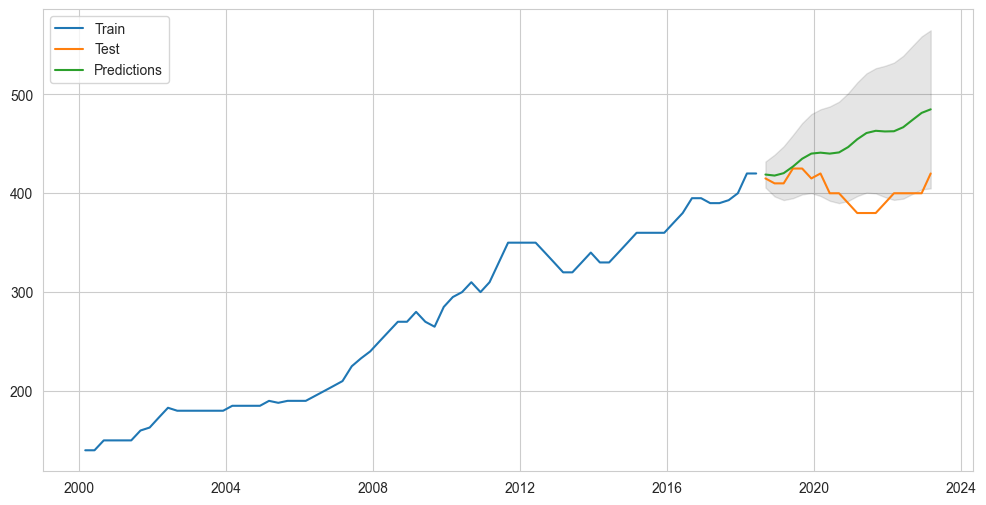

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Median'], label='Train')
plt.plot(test.index, test['Median'], label='Test')
plt.plot(test.index, forecast_mean, label='Predictions')
plt.fill_between(test.index, forecast_ci['lower Median'], forecast_ci['upper Median'], color='k', alpha=0.1)
plt.legend()
plt.show()

We see that although not precise, our model produces reasonable estimates for prices. The actual price was impacted by COVID-19, which posed non-predictable effects to the rental price market.